<a href="https://colab.research.google.com/github/nureeee/Visualization/blob/main/Titanic_mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 가설 세우기
 미혼 여성이 기혼 여성보다 생존률이 높을 것이다

# 2. 데이터 전처리 
** 이름 컬럼에서 파이썬으로 특정 문자열(Miss, Mrs.) 분리 색인 

In [1]:
.!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# csv 파일 불러오기
import pandas as pd 

df = pd.read_csv("/content/drive/MyDrive/train.csv") 

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_MF = df.groupby(['Sex', 'Survived']).size().unstack()
df_MF

Survived,0,1
Sex,,
female,81,233
male,468,109


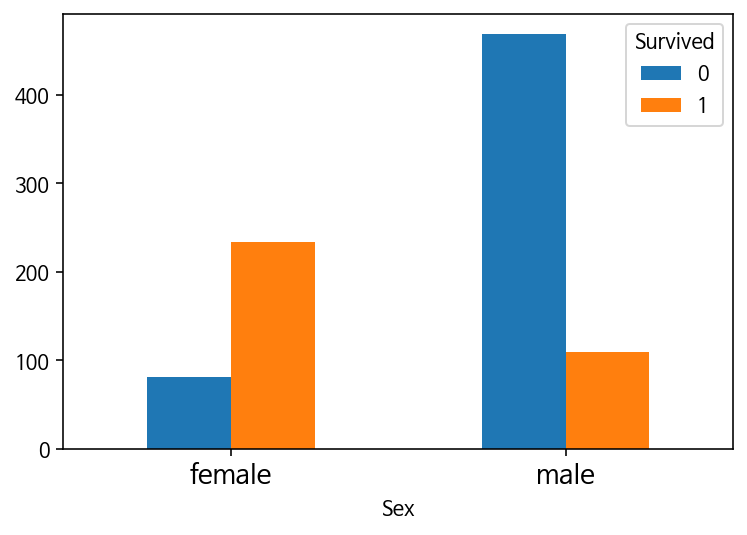

In [6]:
df_MF.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

In [7]:
Fe = df.loc[df['Sex'] == 'female']

In [8]:
Fe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
Fe['결혼여부'] = Fe['Name'].apply(lambda x : 1 if 'Miss' in x  else (0 if 'Mrs' in x else 3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
Female = Fe[["Name","Survived", "Age", "SibSp","Pclass","결혼여부"]]

In [11]:
Female

,Name,Survived,Age,SibSp,Pclass,결혼여부
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,1,0
2,"Heikkinen, Miss. Laina",1,26.0,0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,3,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,2,0
...,...,...,...,...,...,...
880,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25.0,0,2,0
882,"Dahlberg, Miss. Gerda Ulrika",0,22.0,0,3,1
885,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,3,0
887,"Graham, Miss. Margaret Edith",1,19.0,0,1,1


In [12]:
Female.loc[Fe['결혼여부'] == 3]

,Name,Survived,Age,SibSp,Pclass,결혼여부
369,"Aubart, Mme. Leontine Pauline",1,24.0,0,1,3
443,"Reynaldo, Ms. Encarnacion",1,28.0,0,2,3
641,"Sagesser, Mlle. Emma",1,24.0,0,1,3
759,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,1,3
796,"Leader, Dr. Alice (Farnham)",1,49.0,0,1,3


In [13]:
drop_idx3 = Female.loc[Female['결혼여부'] == 3].index
drop_idx3

Int64Index([369, 443, 641, 759, 796], dtype='int64')

In [14]:
Female = Female.drop(drop_idx3, axis= 0)
Female.loc[Female['결혼여부'] == 3] 

,Name,Survived,Age,SibSp,Pclass,결혼여부


In [15]:
stacked_bar_df = Female.groupby(["결혼여부","Survived"]).size().unstack()
stacked_bar_df

Survived,0,1
결혼여부,,
0,26,101
1,55,127


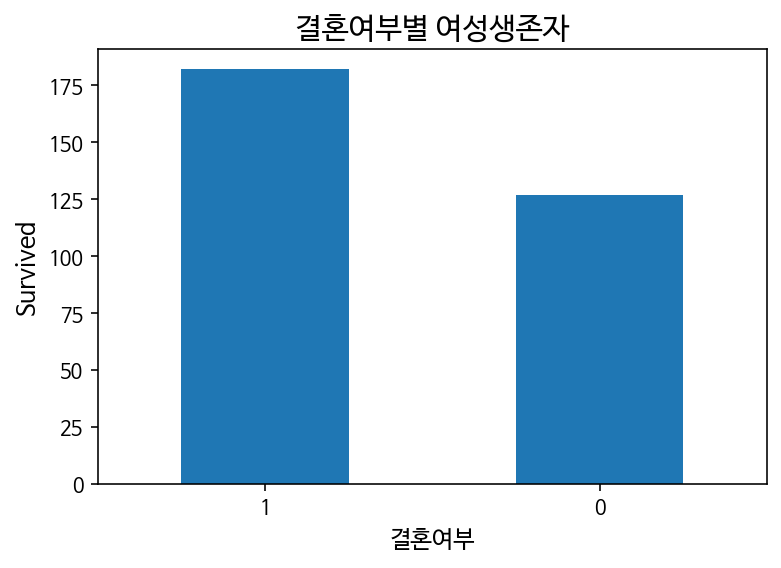

In [16]:
Female["결혼여부"].value_counts().plot(kind='bar')
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.ylabel("Survived", fontsize=12)
plt.xlabel("결혼여부", fontsize=12)

plt.xticks(rotation=0)
plt.show()

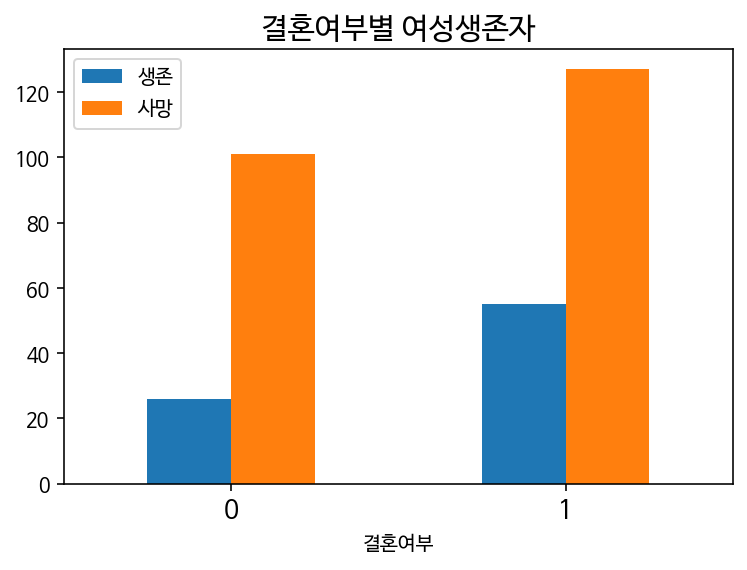

In [17]:
stacked_bar_df.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.legend(["생존", "사망"])
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.show()

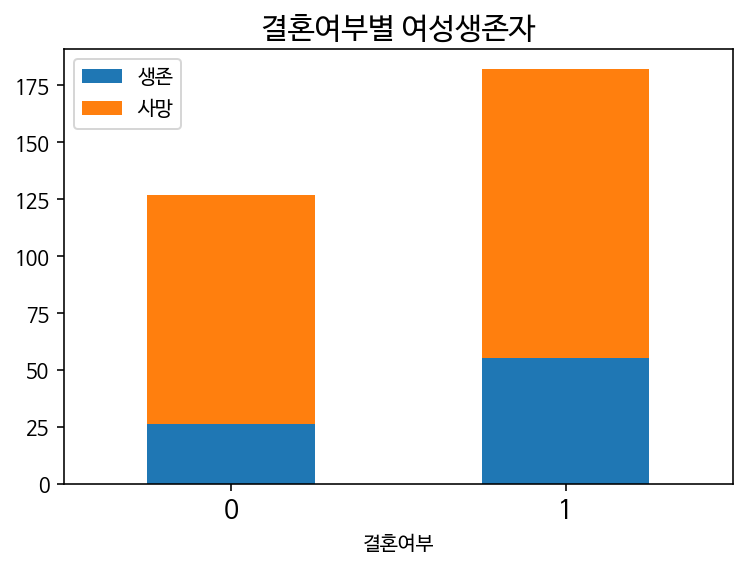

In [18]:
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.legend(["생존", "사망"])
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.show()
#전체 모집단은 작으나 기혼 여성의 비혼 여성의 총 생존 비율이 더 높다

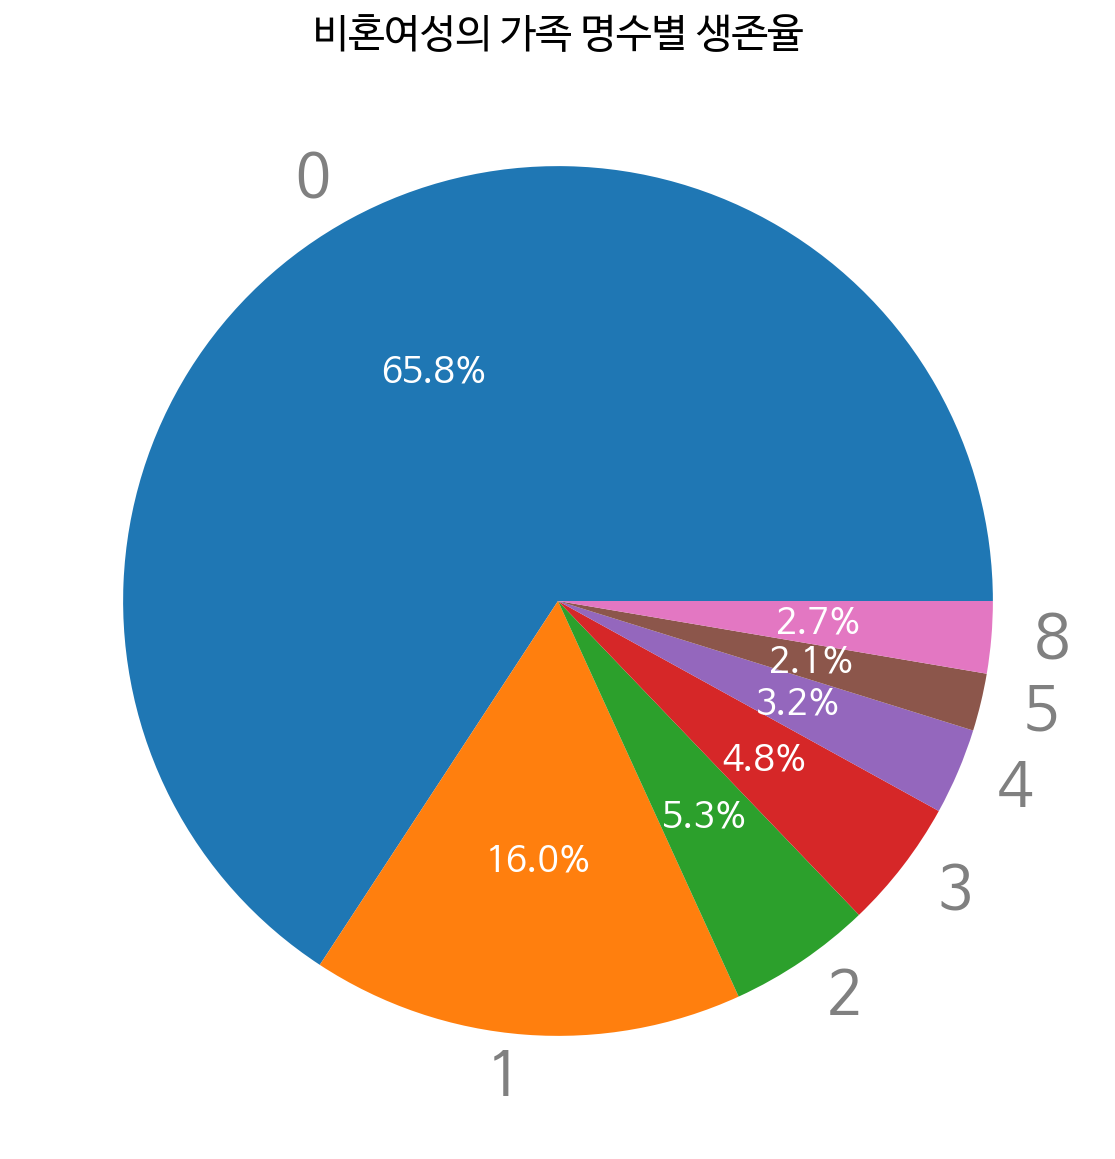

In [19]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("비혼여성의 가족 명수별 생존율", fontsize=20)

labels = ["0", "1", "2", "3", "4", "5", "8"]
sizes  = [123, 30, 10, 9,  6, 4, 5]

_, texts, autotexts = plt.pie(sizes,
                              labels=labels,

                              autopct='%1.1f%%',
                              shadow=False)
                

for t in texts:
  t.set_fontsize(30)
  t.set_color('gray')


for t in autotexts:
  t.set_color("white")
  t.set_fontsize(18)

plt.show()
# 인사이트 -> 비혼 여성의 경우 혼자 여행 갈 때 보다 가족들과 함꼐 여행을 갔을 때 생존율이 높다

In [20]:
stacked_bar_df1 = Female.groupby(["결혼여부","SibSp"]).size().unstack()
stacked_bar_df1

SibSp,0,1,2,3,4,5,8
결혼여부,,,,,,,
0,46.0,76.0,3.0,2.0,NaN,NaN,NaN
1,123.0,30.0,10.0,9.0,6.0,1.0,3.0


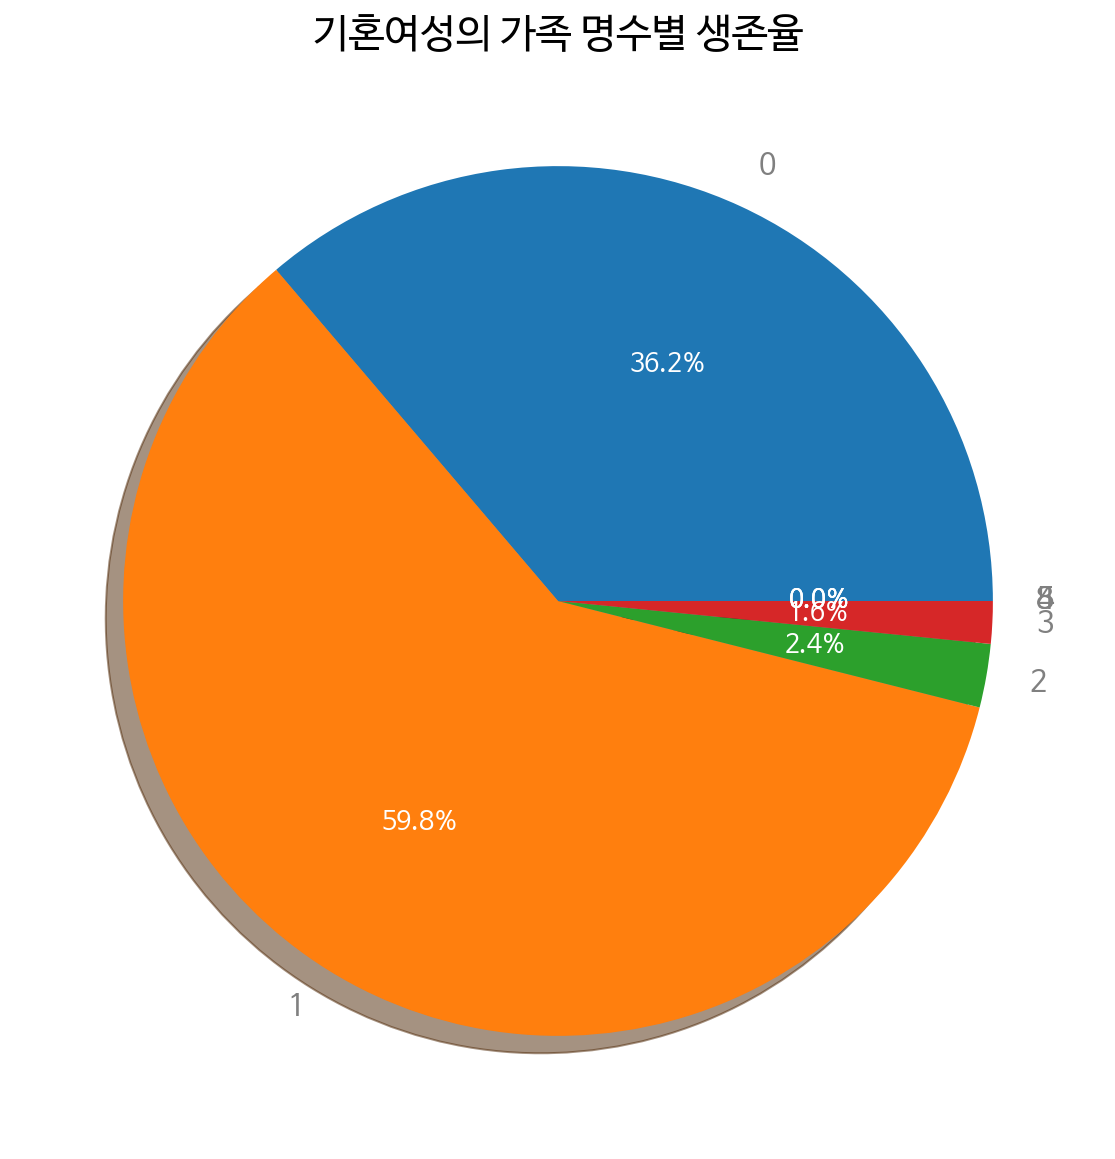

In [21]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("기혼여성의 가족 명수별 생존율", fontsize=20)
labels = ["0", "1", "2", "3", "4", "5", "8"]
sizes  = [46, 76, 3, 2,  0, 0, 0] # NaN를 fillna(0)처리해도 되지만 그냥 직접 적음 

_, texts, autotexts = plt.pie(sizes,
                              labels=labels,
                              autopct='%1.1f%%',
                              shadow=True)
                

for t in texts:
  t.set_fontsize(15)
  t.set_color('gray')


for t in autotexts:
  t.set_color("white")
  t.set_fontsize(13)

plt.show() # 인사이트 -> 기혼 여성의 경우 혼자 여행 갈 때 보다 가족들과 함꼐 여행을 갔을 때 생존율이 높다

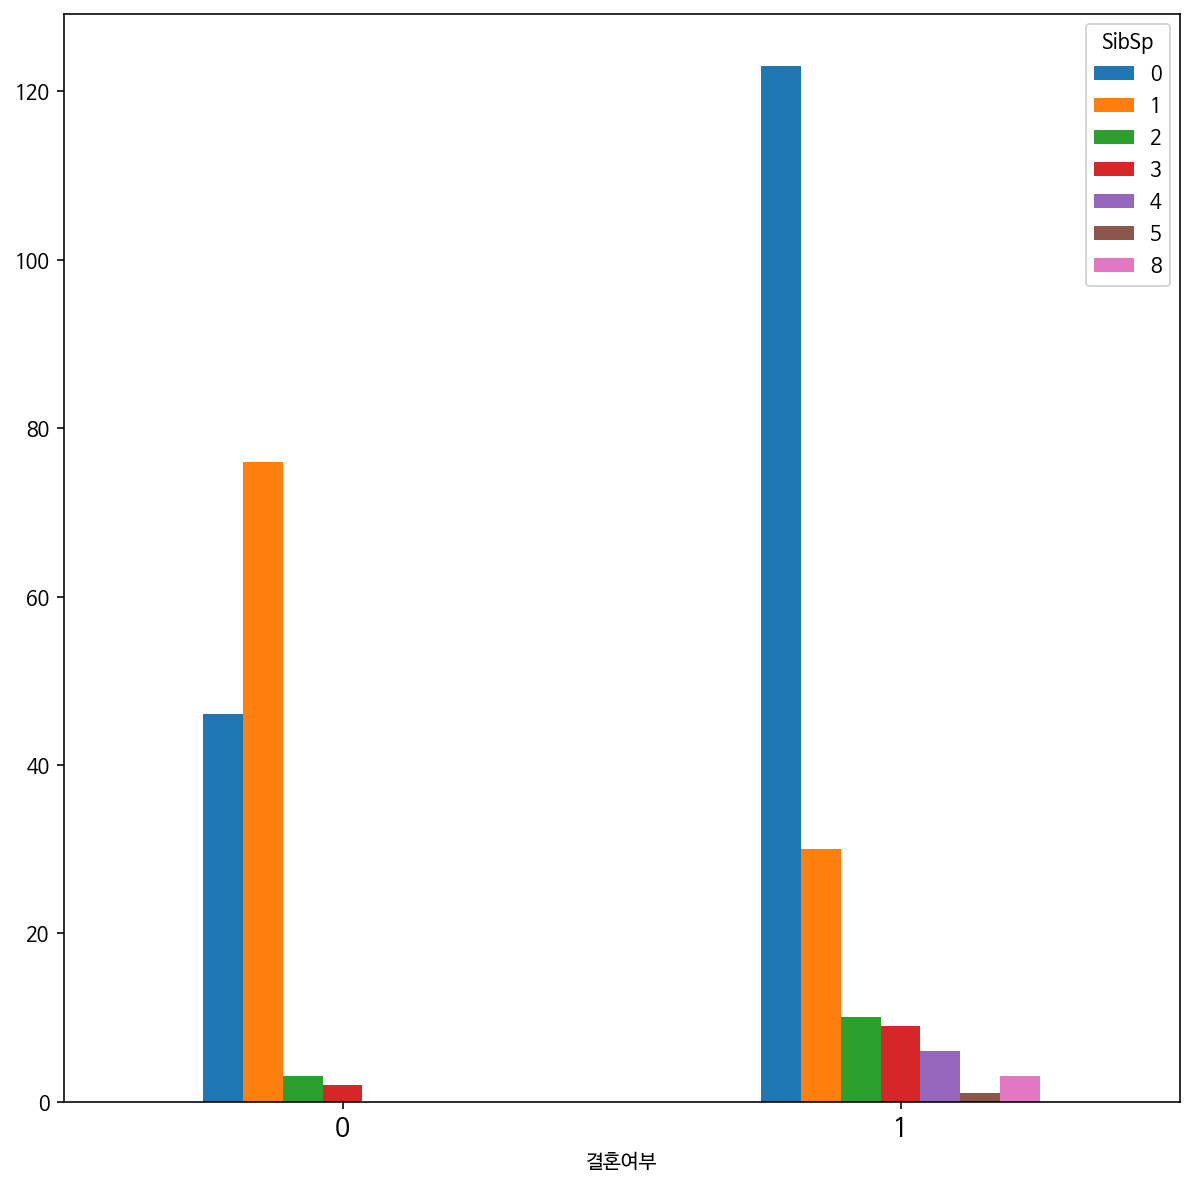

In [22]:
stacked_bar_df1.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


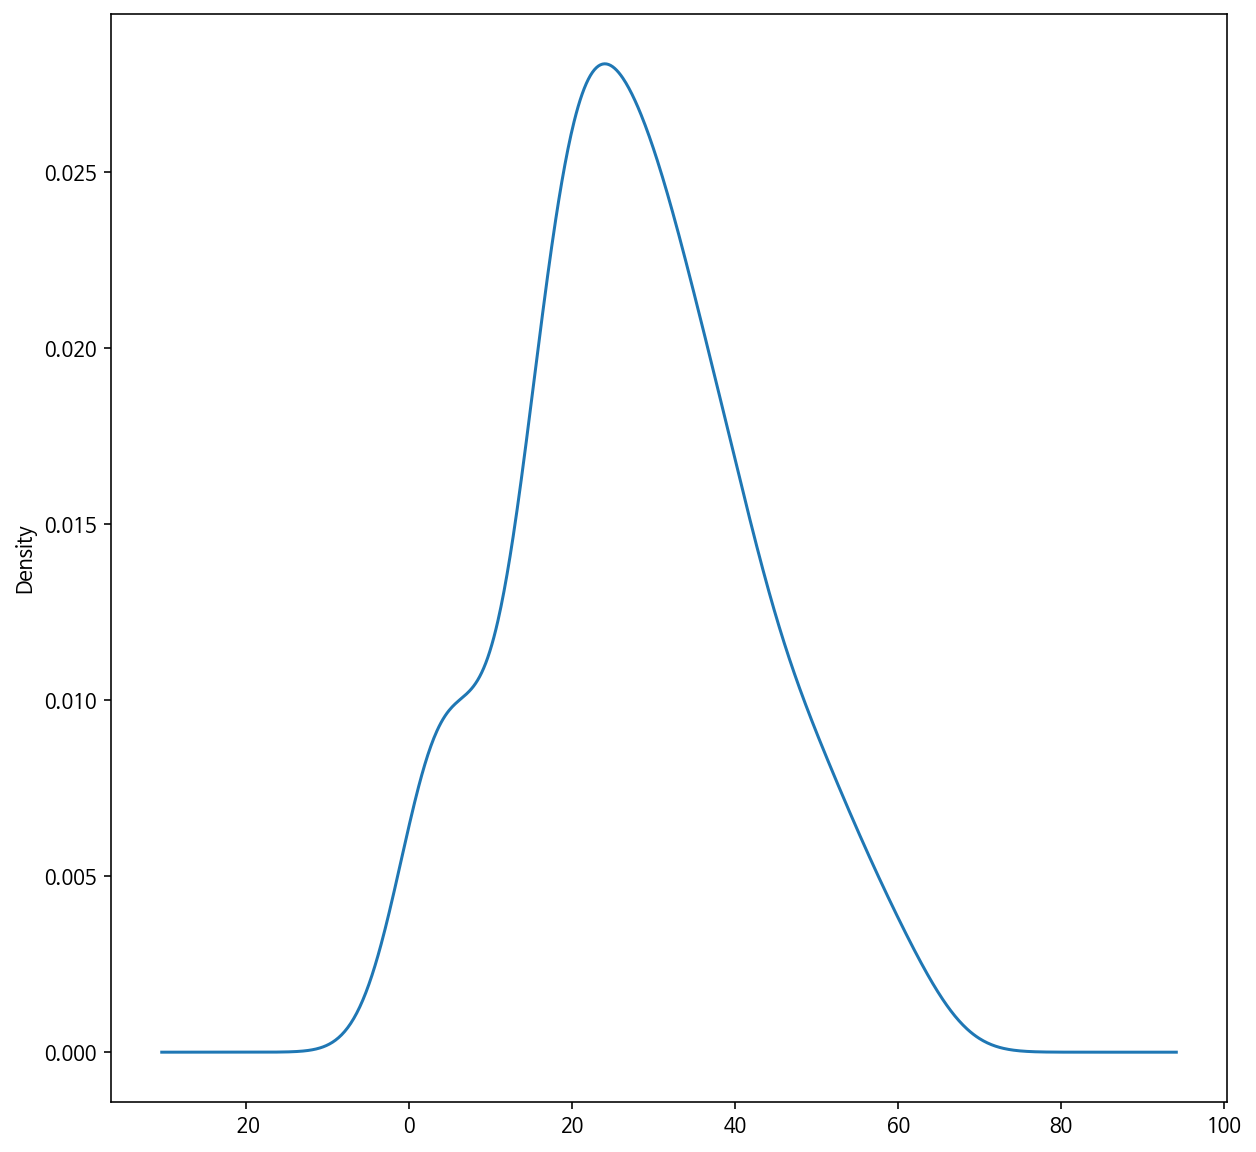

In [23]:
# 연령별 여성 생존율 커널 밀도 그래프
Female['Age'].plot(kind='kde')

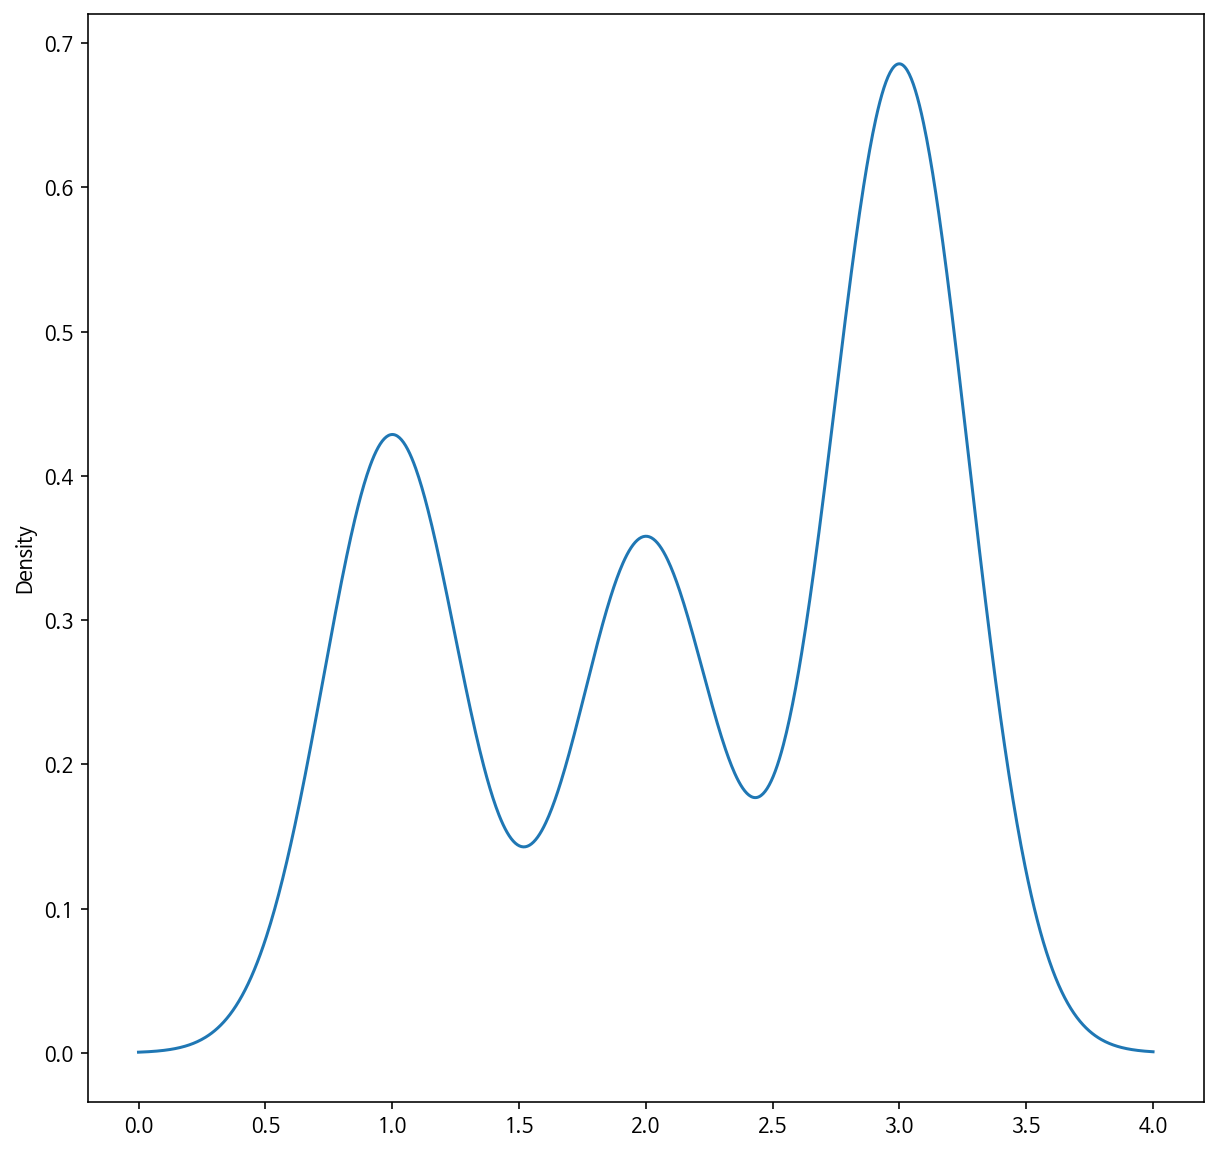

In [24]:

# 클래스별 여성 생존율 커널 밀도 그래프
Female['Pclass'].plot(kind='kde')

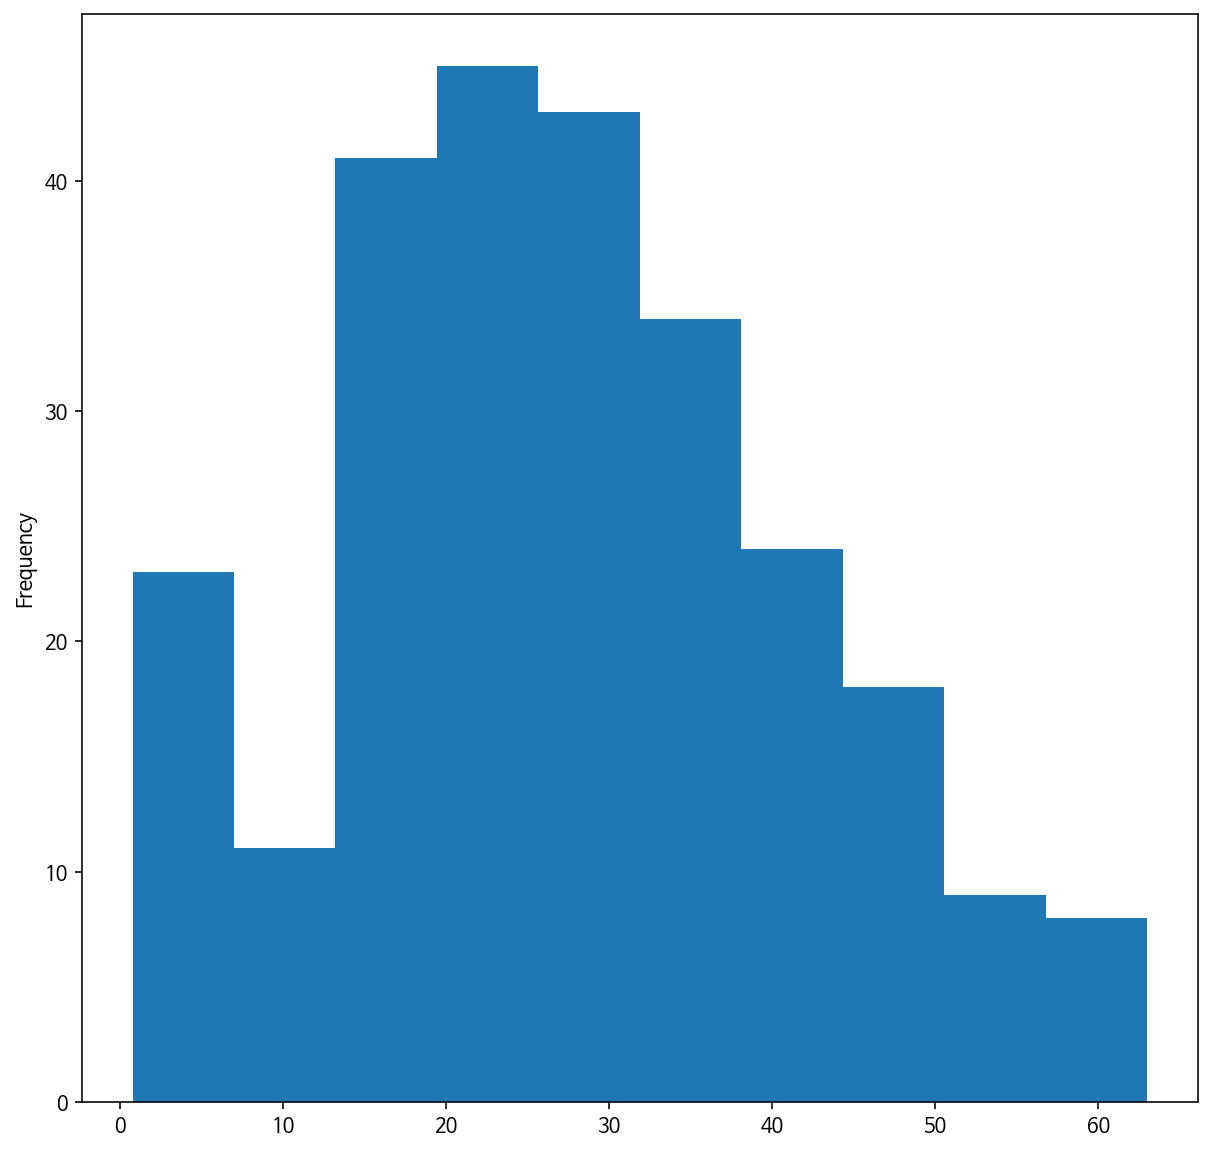

In [25]:
Female['Age'].plot(kind='hist')

In [26]:

female_survival_rate=Female.groupby("Survived")["결혼여부"].count()
female_survival_rate

Survived
0     81
1    228
Name: 결혼여부, dtype: int64

In [27]:
f = Female.copy()

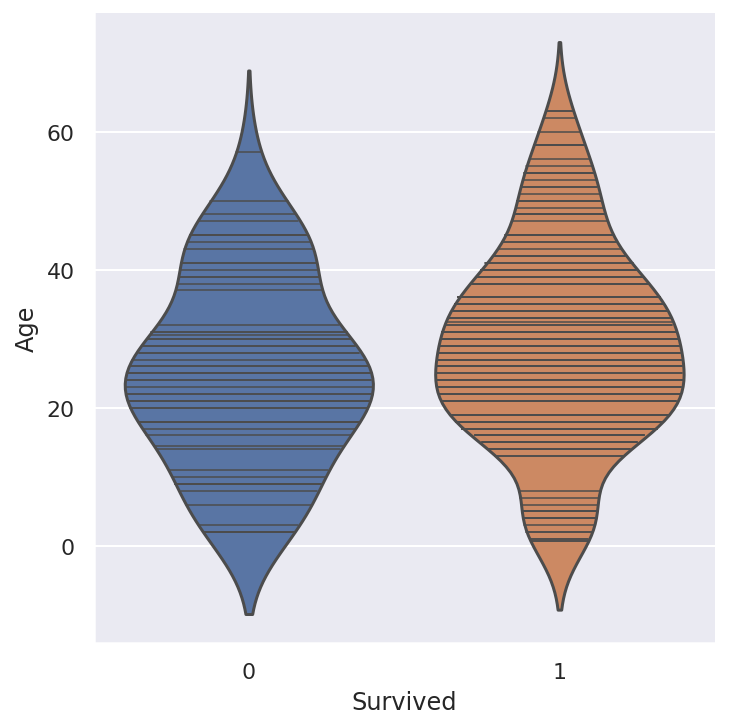

In [28]:
sns.set(style='darkgrid')
sns.catplot(x='Survived', y = 'Age', data=f, kind='violin', inner='stick')
plt.show()

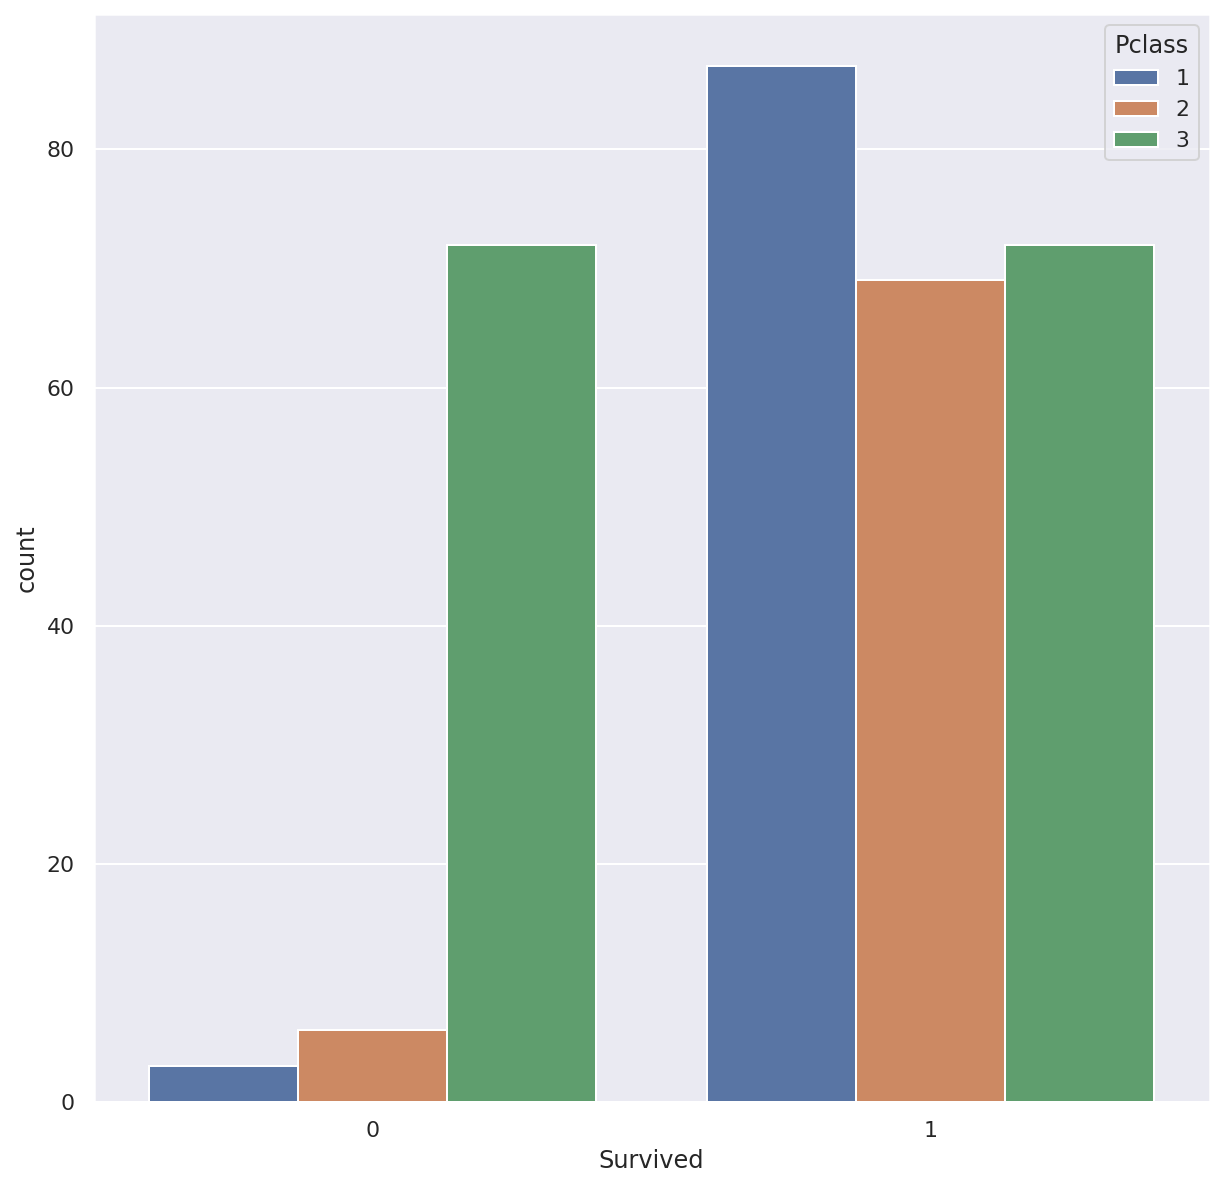

In [29]:
sns.countplot(x='Survived', hue='Pclass', data= f)
plt.show()

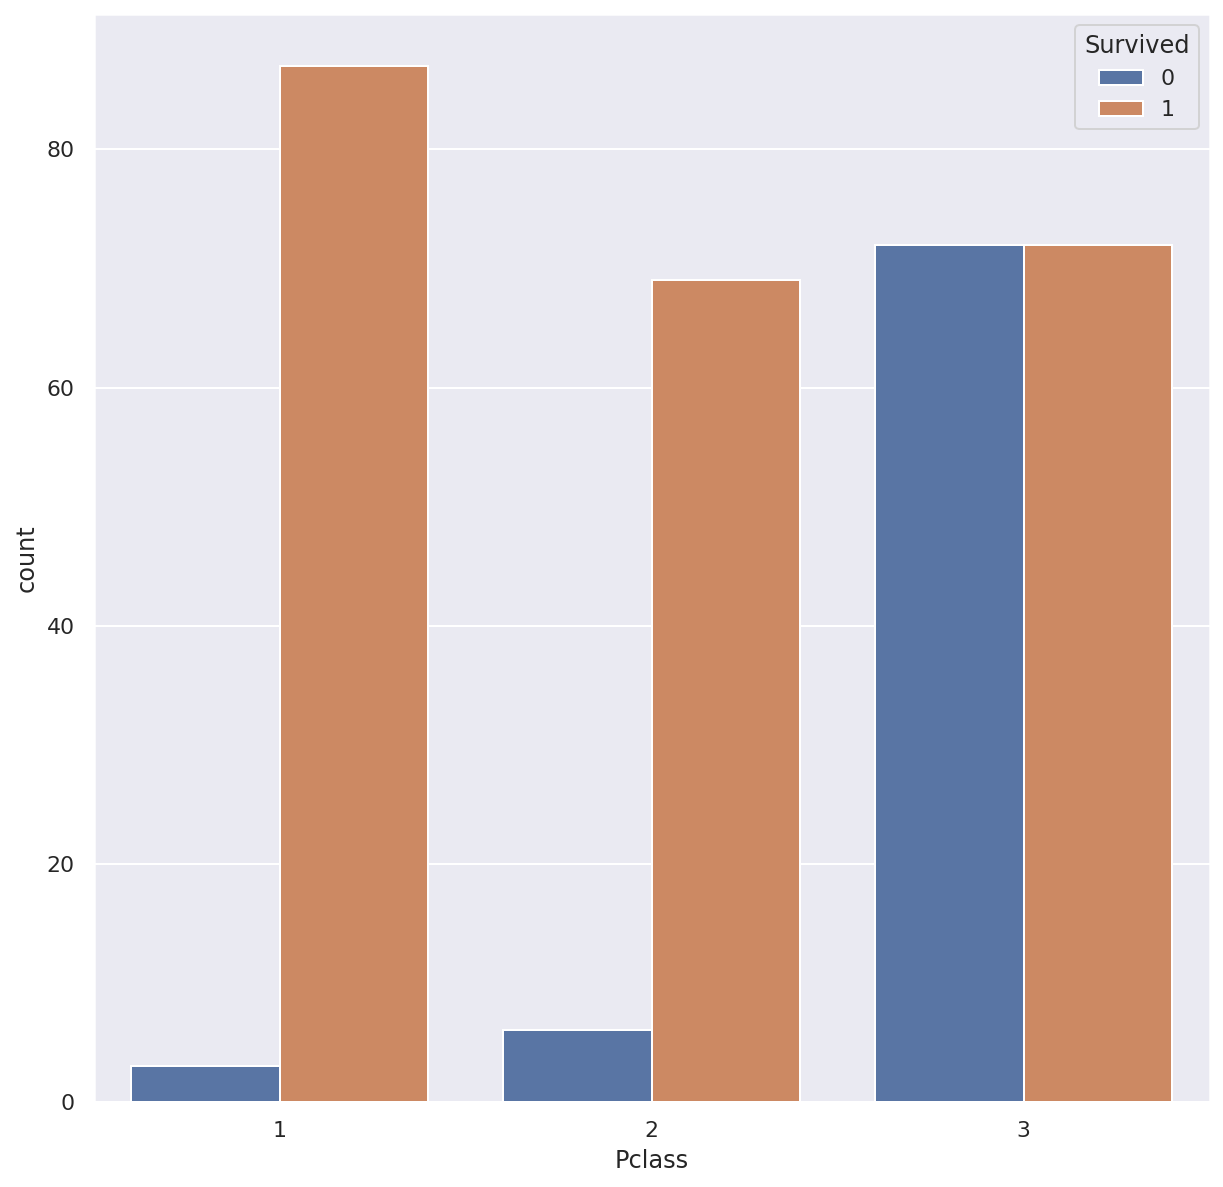

In [30]:
sns.countplot(x='Pclass', hue='Survived', data= f)
plt.show() # 1등급 객실 여성 총 생존자 월등히 높음을 파악할 수 있다